In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cinci_1320 = pd.read_csv('./data/cinci1320.csv', index_col='Date_of_Payment', parse_dates=True).sort_index()

C:\Users\sarah\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (17,18,19,47,48,49,50,51,52,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
cinci_1320.head()

,Change_Type,Covered_Recipient_Type,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,Recipient_Primary_Business_Street_Address_Line1,Recipient_Primary_Business_Street_Address_Line2,Recipient_City,...,xarelto,victoza,humira,levemir,invokana,farxiga,entresto,chantix,myrbetriq,toujeo
Date_of_Payment,,,,,,,,,,,,,,,,,,,,,
2013-08-01,UNCHANGED,Covered Recipient Physician,148974,RODNEY,NaN,VIVIAN,NaN,8000 5 MILE RD,240,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,58931,PAUL,JOSEPH,FAVORITO,NaN,7575 5 MILE RD,NaN,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,812462,ALFRED,JAMES,SUGAWARA,NaN,8477 FOXCROFT DR,NaN,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,108863,MARK,A,MANEGOLD,NaN,2450 KIPLING AVE,SUITE 104,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,195441,MANOJKUMAR,S,SINGH,NaN,10600 MONTGOMERY RD,SUITE 200,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0


In [4]:
cinci_1320['Change_Type'].value_counts()

UNCHANGED    364686
CHANGED         726
ADD               1
Name: Change_Type, dtype: int64

In [5]:
cinci_1320['chantix'].value_counts()

0    361962
1      3451
Name: chantix, dtype: int64

In [6]:
chantix = cinci_1320[(cinci_1320['chantix']==1) & (cinci_1320['Number_of_Payments_Included_in_Total_Amount']==1)].copy()

In [7]:
chantix['chantix'].value_counts()

1    3451
Name: chantix, dtype: int64

In [8]:
chantix['Change_Type'].value_counts()

UNCHANGED    3451
Name: Change_Type, dtype: int64

In [9]:
chantix['chan_dollars'] = [k if ((i ==1) & (j ==1)) else 0 for i, j, k in zip(chantix['chantix'], chantix['Number_of_Payments_Included_in_Total_Amount'], chantix['Total_Amount_of_Payment_USDollars'])]

#Ben Peck helped me with this during office hours.  I was oh-so-close but not quite there!

In [10]:
chantix['chan_dollars'].sum()

32087.03

In [11]:
drop_cols = ['Change_Type','Covered_Recipient_Type',
'Physician_First_Name',
'Physician_Middle_Name',
'Physician_Last_Name',
'Physician_Name_Suffix',
'Recipient_Primary_Business_Street_Address_Line1',
'Recipient_Primary_Business_Street_Address_Line2',
'Recipient_City',
'Recipient_State',
'Recipient_Zip_Code',
'Recipient_Country',
'Physician_Primary_Type',
'Physician_Specialty',
'Physician_License_State_code1',
'Physician_License_State_code2',
'Physician_License_State_code3',
'Physician_License_State_code4',
'Physician_License_State_code5',
'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State',
'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
'Form_of_Payment_or_Transfer_of_Value',
'City_of_Travel',
'State_of_Travel',
'Country_of_Travel',
'Physician_Ownership_Indicator',
'Third_Party_Payment_Recipient_Indicator',
'Name_of_Third_Party_Entity_Receiving_Payment_or_Transfer_of_Value',
'Charity_Indicator',
'Third_Party_Equals_Covered_Recipient_Indicator',
'Contextual_Information',
'Delay_in_Publication_Indicator',
'Dispute_Status_for_Publication',
'Related_Product_Indicator',
'Covered_or_Noncovered_Indicator_1',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1',
'Product_Category_or_Therapeutic_Area_1',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1',
'Associated_Drug_or_Biological_NDC_1',
'Covered_or_Noncovered_Indicator_2',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_2',
'Product_Category_or_Therapeutic_Area_2',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_2',
'Associated_Drug_or_Biological_NDC_2',
'Covered_or_Noncovered_Indicator_3',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_3',
'Product_Category_or_Therapeutic_Area_3',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_3',
'Associated_Drug_or_Biological_NDC_3',
'Covered_or_Noncovered_Indicator_4',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4',
'Product_Category_or_Therapeutic_Area_4',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4',
'Associated_Drug_or_Biological_NDC_4',
'Covered_or_Noncovered_Indicator_5',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5',
'Product_Category_or_Therapeutic_Area_5',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5',
'Associated_Drug_or_Biological_NDC_5', 
'Physician_Profile_ID', 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
'Total_Amount_of_Payment_USDollars','Number_of_Payments_Included_in_Total_Amount', 
'Nature_of_Payment_or_Transfer_of_Value', 'Record_ID', 
'Payment_Publication_Date', 'Program_Year',
'xarelto', 'farxiga', 'victoza', 'humira', 'levemir',
'entresto', 'invokana', 'myrbetriq', 'toujeo']

In [12]:
chantix.drop(columns = drop_cols, inplace = True)

In [13]:
chantix['z_score'] = [ ((i - chantix['chan_dollars'].mean())/chantix['chan_dollars'].std()) for i in chantix['chan_dollars']]

In [14]:
chantix.shape

(3451, 13)

In [15]:
chantixb = chantix[(np.abs(chantix['z_score']) < 3)].copy()

In [16]:
chantixb.shape

(3435, 13)

In [17]:
chantix_wkly = chantixb.resample('w').sum()

In [18]:
chantix_wkly.head()

,chantix,chan_dollars,z_score
Date_of_Payment,,,
2017-01-08,2,10.31,-0.917153
2017-01-15,0,0.00,0.000000
2017-01-22,1,12.69,0.375472
2017-01-29,8,33.57,-4.517603
2017-02-05,10,88.64,-0.480276


In [19]:
chantix_wkly.sort_index()

,chantix,chan_dollars,z_score
Date_of_Payment,,,
2017-01-08,2,10.31,-0.917153
2017-01-15,0,0.00,0.000000
2017-01-22,1,12.69,0.375472
2017-01-29,8,33.57,-4.517603
2017-02-05,10,88.64,-0.480276
...,...,...,...
2020-12-06,1,16.24,0.768421
2020-12-13,4,48.34,1.234018
2020-12-20,5,75.76,3.239952


Look at some plots

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

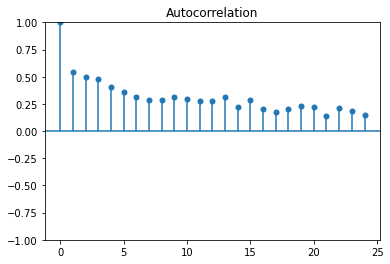

In [21]:
plot_acf(chantix_wkly['chan_dollars'], alpha=None, lags=24);

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


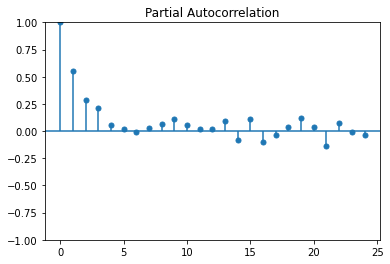

In [22]:
plot_pacf(chantix_wkly['chan_dollars'], alpha=None, lags=24);

Adding 1 to the weekly sales for each observation so that Holt_winters will work.

In [23]:
chantix_wkly['chan_dollars'] = [i+1 for i in chantix_wkly['chan_dollars']]

Set up Train and Test Sets using 2018, 2019 & 2020 Data

In [24]:
train = chantix_wkly.loc[:'2019-12-31']
train

,chantix,chan_dollars,z_score
Date_of_Payment,,,
2017-01-08,2,11.31,-0.917153
2017-01-15,0,1.00,0.000000
2017-01-22,1,13.69,0.375472
2017-01-29,8,34.57,-4.517603
2017-02-05,10,89.64,-0.480276
...,...,...,...
2019-12-01,38,418.54,7.108511
2019-12-08,43,349.44,-5.686075
2019-12-15,19,189.76,1.339351


In [25]:
train['chan_dollars'].max()

510.46999999999997

In [26]:
train.describe()

,chantix,chan_dollars,z_score
count,156.000000,156.000000,156.000000
mean,19.012821,158.129615,-2.175008
std,13.252869,111.370424,4.081424
min,0.000000,1.000000,-14.044677
25%,9.000000,61.742500,-4.568593
50%,17.500000,149.495000,-1.048870
75%,27.250000,231.115000,0.236484
max,59.000000,510.470000,7.312004


In [27]:
train.index.freq = 'W' 

In [28]:
train.shape

(156, 3)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 2017-01-08 to 2019-12-29
Freq: W-SUN
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   chantix       156 non-null    int64  
 1   chan_dollars  156 non-null    float64
 2   z_score       156 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.9 KB


In [30]:
train.index

DatetimeIndex(['2017-01-08', '2017-01-15', '2017-01-22', '2017-01-29',
               '2017-02-05', '2017-02-12', '2017-02-19', '2017-02-26',
               '2017-03-05', '2017-03-12',
               ...
               '2019-10-27', '2019-11-03', '2019-11-10', '2019-11-17',
               '2019-11-24', '2019-12-01', '2019-12-08', '2019-12-15',
               '2019-12-22', '2019-12-29'],
              dtype='datetime64[ns]', name='Date_of_Payment', length=156, freq='W-SUN')

In [31]:
test = chantix_wkly.loc['2020-01-01':]
test

,chantix,chan_dollars,z_score
Date_of_Payment,,,
2020-01-05,5,51.55,0.449460
2020-01-12,25,220.83,-1.396611
2020-01-19,20,210.60,2.616945
2020-01-26,26,305.31,6.925288
2020-02-02,17,179.08,2.215548
2020-02-09,29,332.03,6.795374
2020-02-16,35,363.87,4.144643
2020-02-23,32,346.08,5.263018
2020-03-01,24,267.85,4.837211


In [32]:
test.describe()

,chantix,chan_dollars,z_score
count,53.000000,53.000000,53.000000
mean,8.849057,108.907358,2.836957
std,8.625535,93.605613,2.319159
min,0.000000,1.000000,-1.396611
25%,3.000000,49.340000,1.143893
50%,6.000000,77.950000,2.397021
75%,12.000000,145.210000,4.764619
max,35.000000,363.870000,8.595714


In [33]:
test.shape

(53, 3)

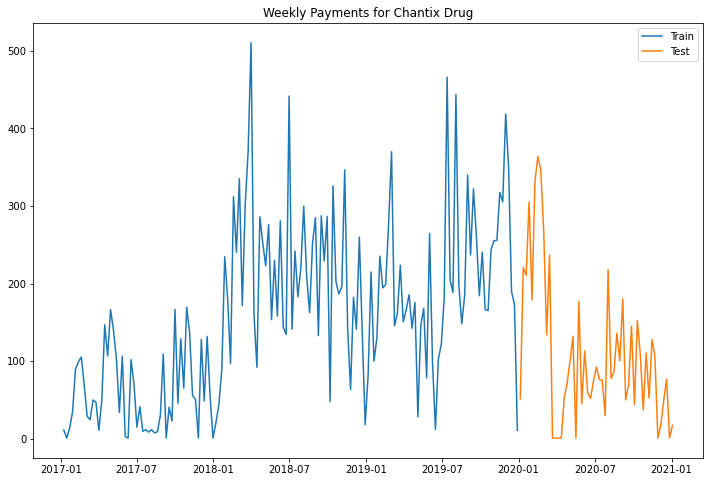

In [34]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['chan_dollars'], label='Train')
plt.plot(test.index, test['chan_dollars'], label='Test')

plt.legend(loc='best')
plt.title("Weekly Payments for Chantix Drug");

Baseline (Naive Model)

In [35]:
df_preds = test.copy(deep=True)
df_preds

,chantix,chan_dollars,z_score
Date_of_Payment,,,
2020-01-05,5,51.55,0.449460
2020-01-12,25,220.83,-1.396611
2020-01-19,20,210.60,2.616945
2020-01-26,26,305.31,6.925288
2020-02-02,17,179.08,2.215548
2020-02-09,29,332.03,6.795374
2020-02-16,35,363.87,4.144643
2020-02-23,32,346.08,5.263018
2020-03-01,24,267.85,4.837211


In [36]:
df_preds['simple_mean'] = train['chan_dollars'].mean()
df_preds

,chantix,chan_dollars,z_score,simple_mean
Date_of_Payment,,,,
2020-01-05,5,51.55,0.449460,158.129615
2020-01-12,25,220.83,-1.396611,158.129615
2020-01-19,20,210.60,2.616945,158.129615
2020-01-26,26,305.31,6.925288,158.129615
2020-02-02,17,179.08,2.215548,158.129615
2020-02-09,29,332.03,6.795374,158.129615
2020-02-16,35,363.87,4.144643,158.129615
2020-02-23,32,346.08,5.263018,158.129615
2020-03-01,24,267.85,4.837211,158.129615


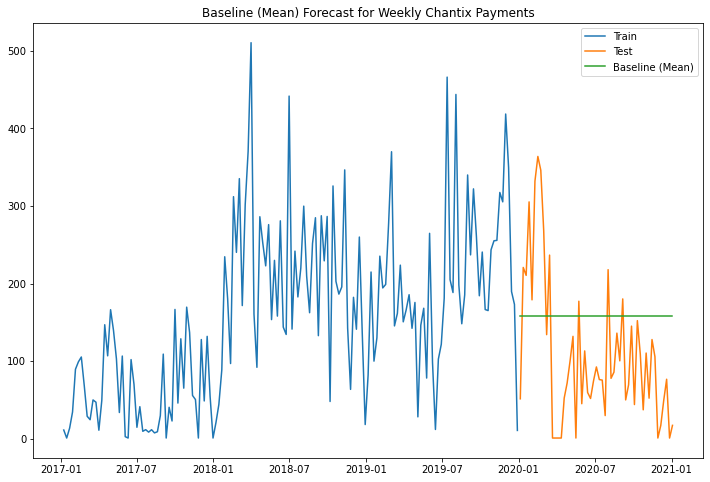

In [37]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['chan_dollars'], label='Train')
plt.plot(test.index, test['chan_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['simple_mean'], label="Baseline (Mean)")

plt.legend(loc='best')
plt.title("Baseline (Mean) Forecast for Weekly Chantix Payments");

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
print("MAE for Simple Mean Baseline Model:", mean_absolute_error(df_preds['chan_dollars'], df_preds['simple_mean']))
print("RMSE for Simple Mean Baseline Model:", mean_squared_error(df_preds['chan_dollars'], df_preds['simple_mean'], squared=False))

MAE for Simple Mean Baseline Model: 92.25412917271407
RMSE for Simple Mean Baseline Model: 104.97390340915642


Make a Seasonal Baseline Model with shift of 7

In [40]:
df_preds['seasonal_7'] = train['chan_dollars'].shift(7, freq='W-SUN') 
df_preds.head(2)

,chantix,chan_dollars,z_score,simple_mean,seasonal_7
Date_of_Payment,,,,,
2020-01-05,5,51.55,0.449460,158.129615,317.46
2020-01-12,25,220.83,-1.396611,158.129615,305.36


In [41]:
df_preds['seasonal_7'].fillna(0, inplace=True)

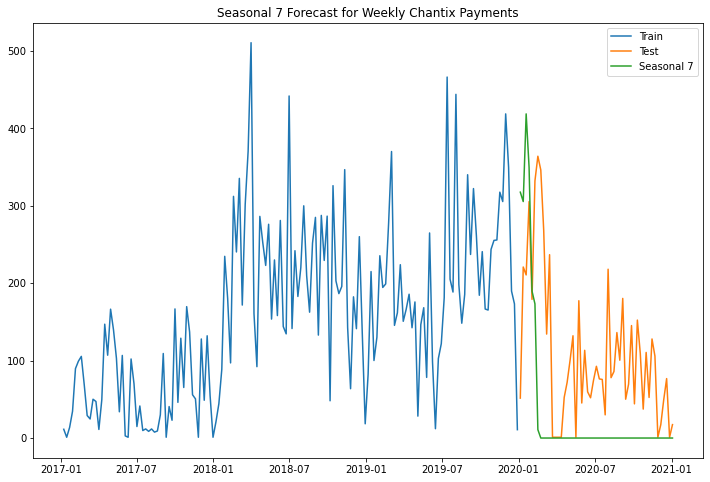

In [42]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['chan_dollars'], label='Train')
plt.plot(test.index, test['chan_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['seasonal_7'], label='Seasonal 7')

plt.legend(loc='best')
plt.title("Seasonal 7 Forecast for Weekly Chantix Payments");

In [43]:
print("MAE for Seasonal Baseline 7 Shift Model:", mean_absolute_error(df_preds['chan_dollars'], df_preds['seasonal_7']))
print("RMSE for Seasonal Baseline 7 Shift Model:", mean_squared_error(df_preds['chan_dollars'], df_preds['seasonal_7'], squared=False))

MAE for Seasonal Baseline 7 Shift Model: 98.75245283018869
RMSE for Seasonal Baseline 7 Shift Model: 129.84581612835177


Seasonal Baseline Model with shift of 52

In [44]:
df_preds['seasonal_52'] = train['chan_dollars'].shift(52, freq='W-SUN') 
df_preds.head(2)

,chantix,chan_dollars,z_score,simple_mean,seasonal_7,seasonal_52
Date_of_Payment,,,,,,
2020-01-05,5,51.55,0.449460,158.129615,317.46,82.43
2020-01-12,25,220.83,-1.396611,158.129615,305.36,214.95


In [45]:
df_preds['seasonal_52'].fillna(0, inplace=True)

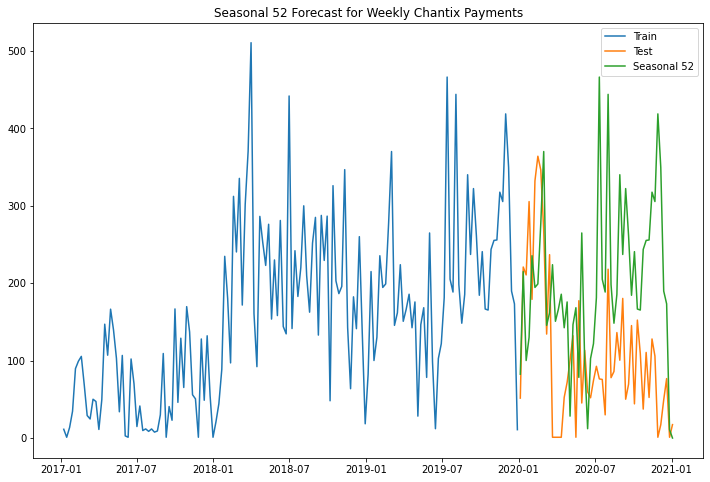

In [46]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['chan_dollars'], label='Train')
plt.plot(test.index, test['chan_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['seasonal_52'], label='Seasonal 52')

plt.legend(loc='best')
plt.title("Seasonal 52 Forecast for Weekly Chantix Payments");

In [47]:
print("MAE for Seasonal Baseline 52 Shift Model:", mean_absolute_error(df_preds['chan_dollars'], df_preds['seasonal_52']))
print("RMSE for Seasonal Baseline 52 Shift Model:", mean_squared_error(df_preds['chan_dollars'], df_preds['seasonal_52'], squared=False))

MAE for Seasonal Baseline 52 Shift Model: 128.93924528301886
RMSE for Seasonal Baseline 52 Shift Model: 159.46808810708274


Simple Exponential Smoothing Model

In [48]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing

In [49]:
ses = SimpleExpSmoothing(train['chan_dollars']).fit(smoothing_level=.5)

In [50]:
ses.summary()

Dep. Variable:,chan_dollars,No. Observations:,156
Model:,SimpleExpSmoothing,SSE,1295441.661
Optimized:,True,AIC,1411.823
Trend:,None,BIC,1417.923
Seasonal:,None,AICC,1412.088
Seasonal Periods:,None,Date:,"Mon, 14 Mar 2022"
Box-Cox:,False,Time:,14:18:30
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
initial_level,15.348448,l.0,True


In [51]:
ses_forecast = ses.forecast(len(test))

In [52]:
df_preds['ses'] = ses_forecast

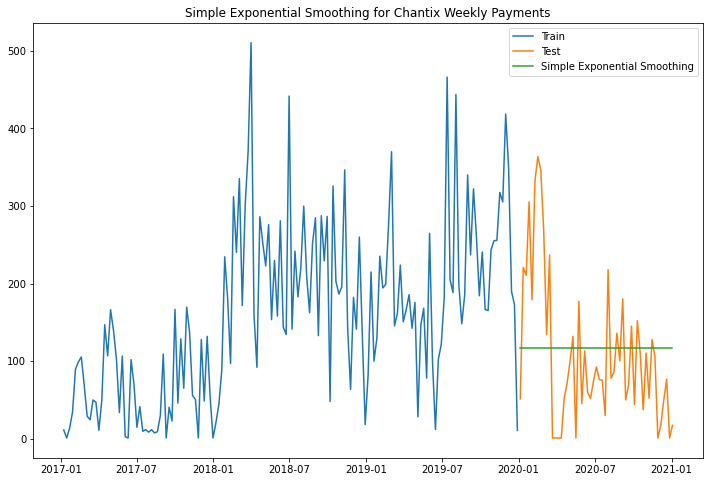

In [53]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['chan_dollars'], label='Train')
plt.plot(test.index, test['chan_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['ses'], label='Simple Exponential Smoothing')

plt.legend(loc='best')
plt.title("Simple Exponential Smoothing for Chantix Weekly Payments");

In [54]:
print("MAE for Simple Exponential Smoothing Model:", mean_absolute_error(df_preds['chan_dollars'], df_preds['ses']))
print("RMSE for Simple Exponential Smoothing Model:", mean_squared_error(df_preds['chan_dollars'], df_preds['ses'], squared=False))

MAE for Simple Exponential Smoothing Model: 74.34067213892565
RMSE for Simple Exponential Smoothing Model: 93.0294903060848


Holt-Winters Multiplicative Model with Seasonality of 52

In [55]:
hw_m52 = ExponentialSmoothing(
    train['chan_dollars'],
    seasonal_periods=52, 
    trend='mul',
    seasonal='mul'
).fit()

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [56]:
hw_m52.summary()

Dep. Variable:,chan_dollars,No. Observations:,156
Model:,ExponentialSmoothing,SSE,856597.037
Optimized:,True,AIC,1455.295
Trend:,Multiplicative,BIC,1626.087
Seasonal:,Multiplicative,AICC,1525.852
Seasonal Periods:,52,Date:,"Mon, 14 Mar 2022"
Box-Cox:,False,Time:,14:18:31
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1464325,alpha,True
smoothing_trend,0.0266245,beta,True


In [57]:
df_preds['hw_m52'] = hw_m52.forecast(len(test))
df_preds.head(2)

,chantix,chan_dollars,z_score,simple_mean,seasonal_7,seasonal_52,ses,hw_m52
Date_of_Payment,,,,,,,,
2020-01-05,5,51.55,0.449460,158.129615,317.46,82.43,116.509743,81.196859
2020-01-12,25,220.83,-1.396611,158.129615,305.36,214.95,116.509743,199.356276


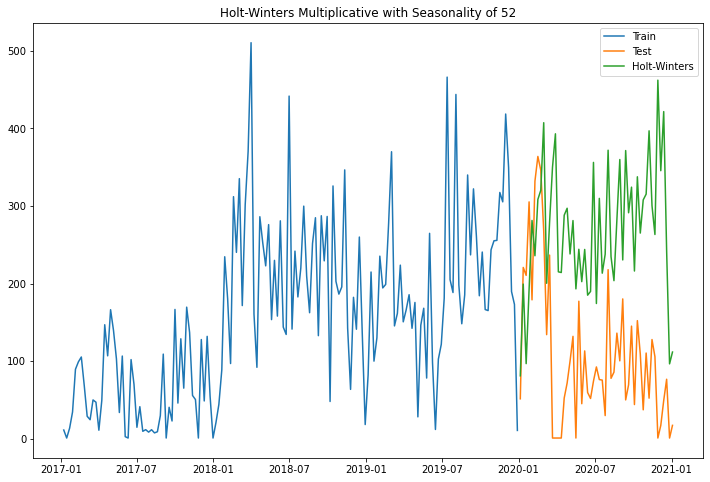

In [58]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['chan_dollars'], label='Train')
plt.plot(test.index, test['chan_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_m52'], label='Holt-Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Multiplicative with Seasonality of 52");

In [59]:
print("MAE for Holt-Winters Multiplicative with Seasonality of 52 Model:", mean_absolute_error(df_preds['chan_dollars'], df_preds['hw_m52']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 52 Model:", mean_squared_error(df_preds['chan_dollars'], df_preds['hw_m52'], squared=False))

MAE for Holt-Winters Multiplicative with Seasonality of 52 Model: 174.74668570997494
RMSE for Holt-Winters Multiplicative with Seasonality of 52 Model: 200.48135285488587


Now, try an additive Holt-Winters Model with a seasonal period of 52.

In [60]:
hw_a52 = ExponentialSmoothing(
    train['chan_dollars'],
    seasonal_periods=52, 
    trend='add',
    seasonal='add'
).fit()

In [61]:
hw_a52.summary()

Dep. Variable:,chan_dollars,No. Observations:,156
Model:,ExponentialSmoothing,SSE,820469.635
Optimized:,True,AIC,1448.573
Trend:,Additive,BIC,1619.365
Seasonal:,Additive,AICC,1519.130
Seasonal Periods:,52,Date:,"Mon, 14 Mar 2022"
Box-Cox:,False,Time:,14:18:32
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2874616,alpha,True
smoothing_trend,0.0282290,beta,True


In [62]:
df_preds['hw_a52'] = hw_a52.forecast(len(test))
df_preds.head(2)

,chantix,chan_dollars,z_score,simple_mean,seasonal_7,seasonal_52,ses,hw_m52,hw_a52
Date_of_Payment,,,,,,,,,
2020-01-05,5,51.55,0.449460,158.129615,317.46,82.43,116.509743,81.196859,168.627341
2020-01-12,25,220.83,-1.396611,158.129615,305.36,214.95,116.509743,199.356276,221.310326


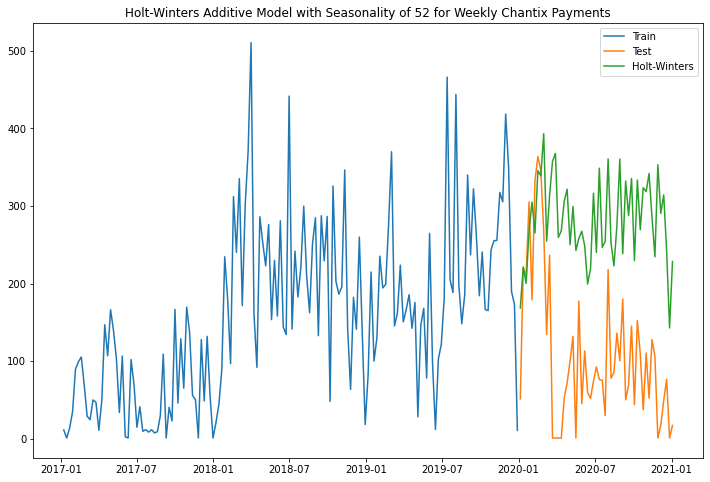

In [63]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['chan_dollars'], label='Train')
plt.plot(test.index, test['chan_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_a52'], label='Holt-Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Additive Model with Seasonality of 52 for Weekly Chantix Payments");

In [64]:
print("MAE for Holt-Winters Additive with Seasonality of 52 Model:", mean_absolute_error(df_preds['chan_dollars'], df_preds['hw_a52']))
print("RMSE for Holt-Winters Additive with Seasonality of 52 Model:", mean_squared_error(df_preds['chan_dollars'], df_preds['hw_a52'], squared=False))

MAE for Holt-Winters Additive with Seasonality of 52 Model: 177.83719159839023
RMSE for Holt-Winters Additive with Seasonality of 52 Model: 198.60492627617054


Now, try an additive Holt-Winters Model with a seasonal period of 7.

In [65]:
hw_a7 = ExponentialSmoothing(
    train['chan_dollars'],
    seasonal_periods=7, 
    trend='add',
    seasonal='add'
).fit()

In [66]:
hw_a7.summary()

Dep. Variable:,chan_dollars,No. Observations:,156
Model:,ExponentialSmoothing,SSE,1218114.465
Optimized:,True,AIC,1420.222
Trend:,Additive,BIC,1453.770
Seasonal:,Additive,AICC,1422.785
Seasonal Periods:,7,Date:,"Mon, 14 Mar 2022"
Box-Cox:,False,Time:,14:18:32
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2442642,alpha,True
smoothing_trend,0.0001178,beta,True


In [67]:
df_preds['hw_a7'] = hw_a7.forecast(len(test))
df_preds.head(2)

,chantix,chan_dollars,z_score,simple_mean,seasonal_7,seasonal_52,ses,hw_m52,hw_a52,hw_a7
Date_of_Payment,,,,,,,,,,
2020-01-05,5,51.55,0.449460,158.129615,317.46,82.43,116.509743,81.196859,168.627341,181.396183
2020-01-12,25,220.83,-1.396611,158.129615,305.36,214.95,116.509743,199.356276,221.310326,188.921355


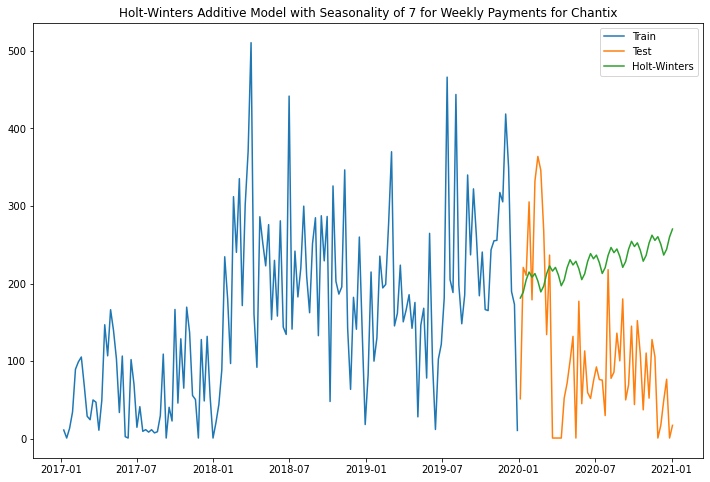

In [68]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['chan_dollars'], label='Train')
plt.plot(test.index, test['chan_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_a7'], label='Holt-Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Additive Model with Seasonality of 7 for Weekly Payments for Chantix");

In [69]:
print("MAE for Holt-Winters Additive with Seasonality of 7 Model:", mean_absolute_error(df_preds['chan_dollars'], df_preds['hw_a7']))
print("RMSE for Holt-Winters Additive with Seasonality of 7 Model:", mean_squared_error(df_preds['chan_dollars'], df_preds['hw_a7'], squared=False))

MAE for Holt-Winters Additive with Seasonality of 7 Model: 143.46090920814072
RMSE for Holt-Winters Additive with Seasonality of 7 Model: 156.85455463909219


Now, try a multiplicative Holt-Winters Model with a seasonal period of 7.

In [70]:
hw_m7 = ExponentialSmoothing(
    train['chan_dollars'],
    seasonal_periods=7, 
    trend='mul',
    seasonal='mul'
).fit()

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [71]:
hw_m7.summary()

Dep. Variable:,chan_dollars,No. Observations:,156
Model:,ExponentialSmoothing,SSE,1349016.749
Optimized:,True,AIC,1436.145
Trend:,Multiplicative,BIC,1469.693
Seasonal:,Multiplicative,AICC,1438.708
Seasonal Periods:,7,Date:,"Mon, 14 Mar 2022"
Box-Cox:,False,Time:,14:18:33
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1111137,alpha,True
smoothing_trend,0.0001011,beta,True


In [72]:
df_preds['hw_m7'] = hw_m7.forecast(len(test))
df_preds.head(2)

,chantix,chan_dollars,z_score,simple_mean,seasonal_7,seasonal_52,ses,hw_m52,hw_a52,hw_a7,hw_m7
Date_of_Payment,,,,,,,,,,,
2020-01-05,5,51.55,0.449460,158.129615,317.46,82.43,116.509743,81.196859,168.627341,181.396183,205.277992
2020-01-12,25,220.83,-1.396611,158.129615,305.36,214.95,116.509743,199.356276,221.310326,188.921355,225.349938


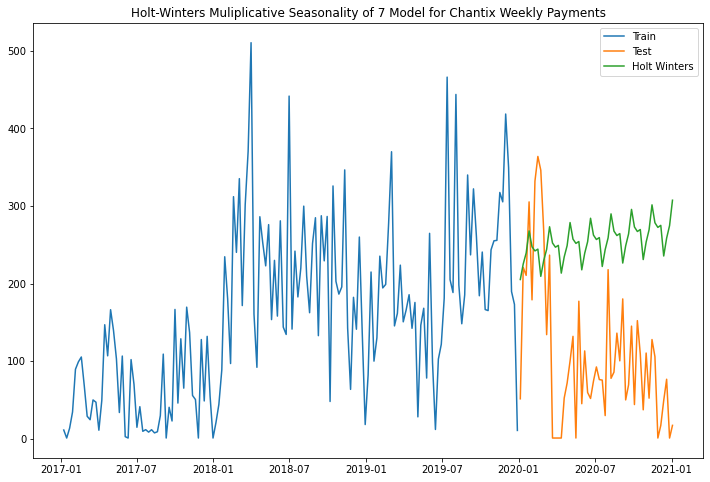

In [73]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['chan_dollars'], label='Train')
plt.plot(test.index, test['chan_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_m7'], label='Holt Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Muliplicative Seasonality of 7 Model for Chantix Weekly Payments");

In [74]:
print("MAE for Holt-Winters Multiplicative with Seasonality of 7 Model:", mean_absolute_error(df_preds['chan_dollars'], df_preds['hw_m7']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 7 Model:", mean_squared_error(df_preds['chan_dollars'], df_preds['hw_m7'], squared=False))

MAE for Holt-Winters Multiplicative with Seasonality of 7 Model: 161.7331403423747
RMSE for Holt-Winters Multiplicative with Seasonality of 7 Model: 176.2143158538378


Try a SARIMA Model

In [75]:
from pmdarima.utils import tsdisplay

In [76]:
traina = train['chan_dollars']

C:\Users\sarah\anaconda3\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


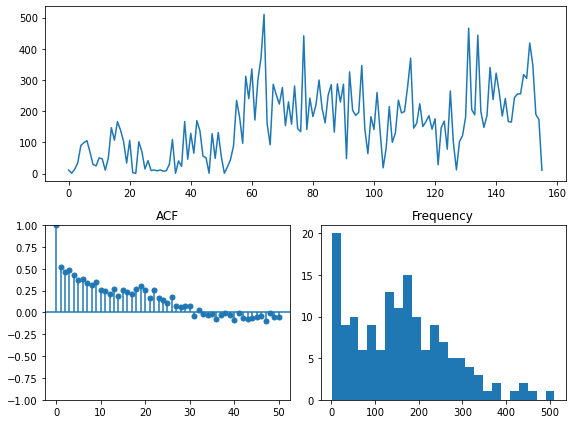

In [77]:
tsdisplay(traina)

In [78]:
import pmdarima as pmd
model_s7 = pmd.auto_arima(train['chan_dollars'], m=7, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=1838.236, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1895.613, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1865.975, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=1836.770, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=1893.613, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=1835.327, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=1836.929, Time=0.08 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=1833.947, Time=0.17 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=1834.819, Time=0.34 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=1834.862, Time=0.64 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=1835.106, Time=0.47 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=1836.194, Time=0.22 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=1836.649, Time=1.23 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=1892.112, Time=0.18 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept

In [79]:
model_s7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  156
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood                -912.577
Date:                           Mon, 14 Mar 2022   AIC                           1833.154
Time:                                   14:18:42   BIC                           1845.328
Sample:                                        0   HQIC                          1838.099
                                           - 156                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7506      0.043    -17.480      0.000      -0.835      -0.666
ar.S.L7        0.6890      0.233      2.952      0.003       0.232       1.146
ma.S.L7       -0.8209      0.199     -4.120      0.000      -1.212      -0.430
sigma2      7535.6026    667.248     11.294      0.000    6227.821    8843.384
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                17.66
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               3.66   Skew:                             0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
preds_sar7 = model_s7.predict(test.shape[0])
preds_sar7

array([212.73506746, 199.72427181, 184.67591185, 165.98680668,
       193.62560858, 194.47378905, 214.01796073, 208.59078367,
       199.6265044 , 189.25836822, 176.38180306, 195.42459993,
       196.00898592, 209.47468147, 205.73542276, 199.55914386,
       192.41562467, 183.54382858, 196.664083  , 197.06671781,
       206.34441755, 203.76811398, 199.51273326, 194.59093581,
       188.47837667, 197.5180717 , 197.79548216, 204.18770395,
       202.41266226, 199.48075693, 196.0896986 , 191.87822003,
       198.10645948, 198.2975919 , 202.70175462, 201.47877258,
       199.45872562, 197.12232786, 194.22067057, 198.51185147,
       198.64353937, 201.67795369, 200.835334  , 199.44354632,
       197.83379681, 195.83459038, 198.7911616 , 198.88189295,
       200.97256735, 200.39201268, 199.43308797, 198.32399022,
       196.94656141])

In [81]:
df_preds['sarima7_auto'] = preds_sar7
df_preds['sarima7_auto'].head(2)

Date_of_Payment
2020-01-05    212.735067
2020-01-12    199.724272
Freq: W-SUN, Name: sarima7_auto, dtype: float64

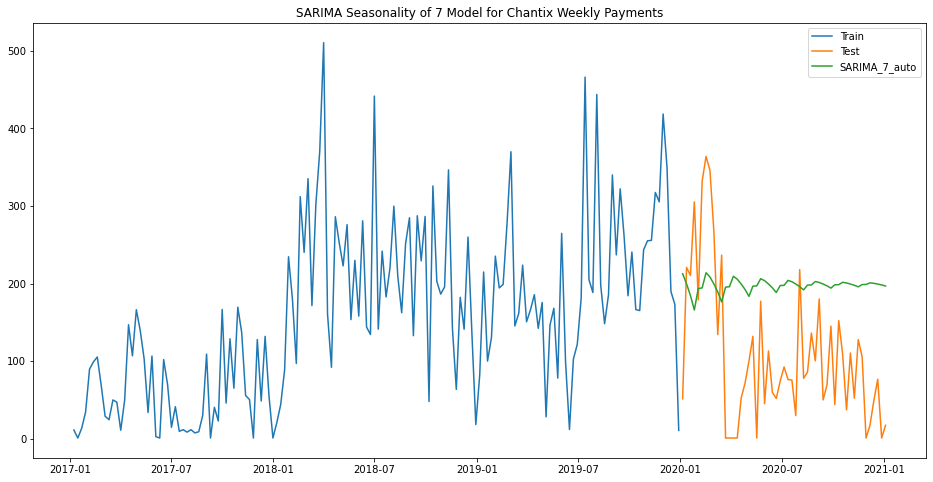

In [82]:
plt.figure(figsize=(16,8))
plt.plot(train['chan_dollars'], label='Train')
plt.plot(test['chan_dollars'], label='Test')
plt.plot(df_preds['sarima7_auto'], label='SARIMA_7_auto')
plt.legend(loc='best')
plt.title("SARIMA Seasonality of 7 Model for Chantix Weekly Payments");

In [83]:
print("MAE for SARIMA with Seasonality of 7 Model:", mean_absolute_error(df_preds['chan_dollars'], df_preds['sarima7_auto']))
print("RMSE for SARIMA with Seasonality of 7 Model:", mean_squared_error(df_preds['chan_dollars'], df_preds['sarima7_auto'], squared=False))

MAE for SARIMA with Seasonality of 7 Model: 117.47642010432479
RMSE for SARIMA with Seasonality of 7 Model: 129.60150754727954


Try a SARIMA Model with m = 52

In [84]:
model_s52 = pmd.auto_arima(train['chan_dollars'], m=52, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=4.74 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=1895.613, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=1865.704, Time=0.79 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=1835.269, Time=0.96 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=1893.613, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=1835.327, Time=0.04 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=1.70 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=1837.028, Time=5.03 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=1835.370, Time=0.92 sec
 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=1839.028, Time=6.85 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=1896.111, Time=0.48 sec
 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=1836.505, Time=1.67 sec
 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=1836.463, Time=1.90 sec
 ARIMA(1,1,0)(0,0,1)[52] intercept   : AIC=1865.690, Time=0.77 sec
 ARIMA(1,1,2)(0,0,1)[52] inte

In [85]:
model_s52.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  156
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 52)   Log Likelihood                -913.844
Date:                            Mon, 14 Mar 2022   AIC                           1833.688
Time:                                    14:19:28   BIC                           1842.818
Sample:                                         0   HQIC                          1837.396
                                            - 156                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7674      0.041    -18.501      0.000      -0.849      -0.686
ma.S.L52       0.1339      0.110      1.215      0.224      -0.082       0.350
sigma2      7645.8072    678.830     11.263      0.000    6315.325    8976.289
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                19.40
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               3.60   Skew:                             0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
preds_sar52 = model_s52.predict(test.shape[0])
preds_sar52

array([193.22377199, 210.51699873, 194.378217  , 195.83275751,
       211.0263035 , 207.06223428, 203.82747594, 215.51303772,
       226.11840882, 198.99239196, 198.887321  , 205.967312  ,
       193.59628075, 202.01900251, 206.08819992, 196.72307994,
       201.92786141, 182.65809166, 197.42873493, 202.38622235,
       189.14953633, 215.15456834, 190.70247444, 181.80962283,
       194.02881565, 190.96250587, 204.36346327, 240.61738389,
       206.73801923, 203.84683952, 236.59495139, 205.33602518,
       199.49143686, 202.92566764, 223.19897767, 211.88474278,
       220.59852805, 213.40588438, 202.47042765, 213.99858155,
       199.30105794, 201.17499821, 212.19940647, 213.51001572,
       210.69319707, 222.59367285, 222.2722823 , 235.59646495,
       226.89704399, 203.59059637, 203.43107444, 183.65367138,
       206.97662257])

In [87]:
df_preds['sarima52_auto'] = preds_sar52
df_preds['sarima52_auto'].head(2)

Date_of_Payment
2020-01-05    193.223772
2020-01-12    210.516999
Freq: W-SUN, Name: sarima52_auto, dtype: float64

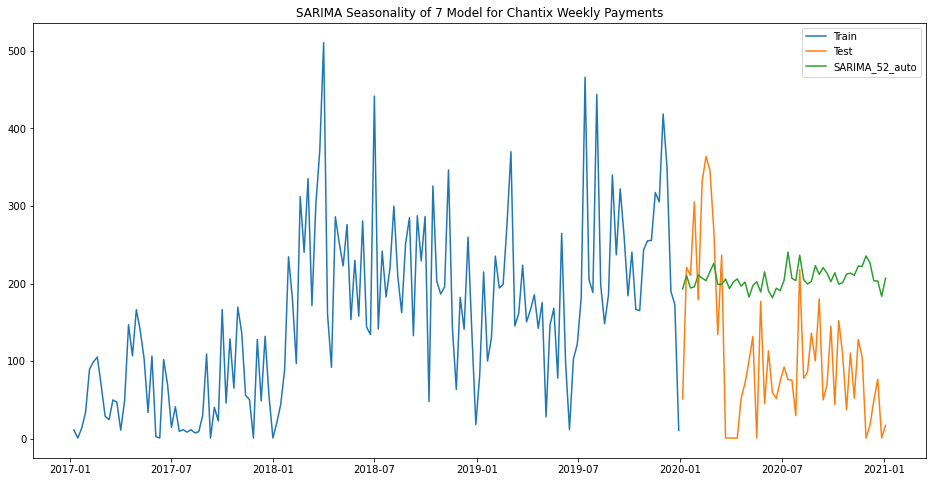

In [88]:
plt.figure(figsize=(16,8))
plt.plot(train['chan_dollars'], label='Train')
plt.plot(test['chan_dollars'], label='Test')
plt.plot(df_preds['sarima52_auto'], label='SARIMA_52_auto')
plt.legend(loc='best')
plt.title("SARIMA Seasonality of 7 Model for Chantix Weekly Payments");

In [89]:
print("MAE for Holt-Winters Additive with Seasonality of 52 Model:", mean_absolute_error(df_preds['chan_dollars'], df_preds['sarima52_auto']))
print("RMSE for Holt-Winters Additive with Seasonality of 52 Model:", mean_squared_error(df_preds['chan_dollars'], df_preds['sarima52_auto'], squared=False))

MAE for Holt-Winters Additive with Seasonality of 52 Model: 121.19923318329867
RMSE for Holt-Winters Additive with Seasonality of 52 Model: 134.58991110662498


In [90]:
print("Summary of Metrics for Weekly Chantix CMS Payments")
print("_________________________________________________")
print("MAE for Simple Mean Baseline Model:", mean_absolute_error(df_preds['chan_dollars'], df_preds['simple_mean']))
print("RMSE for Simple Mean Baseline Model:", mean_squared_error(df_preds['chan_dollars'], df_preds['simple_mean'], squared=False))
print("_________________________________________________")
print("MAE for Seasonal Baseline 7 Shift Model:", mean_absolute_error(df_preds['chan_dollars'], df_preds['seasonal_7']))
print("RMSE for Seasonal Baseline 7 Shift Model:", mean_squared_error(df_preds['chan_dollars'], df_preds['seasonal_7'], squared=False))
print("_________________________________________________")
print("MAE for Seasonal Baseline 52 Shift Model:", mean_absolute_error(df_preds['chan_dollars'], df_preds['seasonal_52']))
print("RMSE for Seasonal Baseline 52 Shift Model:", mean_squared_error(df_preds['chan_dollars'], df_preds['seasonal_52'], squared=False))
print("_________________________________________________")
print("MAE for Simple Exponential Smoothing Model:", mean_absolute_error(df_preds['chan_dollars'], df_preds['ses']))
print("RMSE for Simple Exponential Smoothing Model:", mean_squared_error(df_preds['chan_dollars'], df_preds['ses'], squared=False))
print("_________________________________________________")
print("MAE for Holt-Winters Multiplicative with Seasonality of 7 Model:", mean_absolute_error(df_preds['chan_dollars'], df_preds['hw_m7']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 7 Model:", mean_squared_error(df_preds['chan_dollars'], df_preds['hw_m7'], squared=False))
print("_________________________________________________")
print("MAE for Holt-Winters Multiplicative with Seasonality of 52 Model:", mean_absolute_error(df_preds['chan_dollars'], df_preds['hw_m52']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 52 Model:", mean_squared_error(df_preds['chan_dollars'], df_preds['hw_m52'], squared=False))
print("_________________________________________________")


Summary of Metrics for Weekly Chantix CMS Payments
_________________________________________________
MAE for Simple Mean Baseline Model: 92.25412917271407
RMSE for Simple Mean Baseline Model: 104.97390340915642
_________________________________________________
MAE for Seasonal Baseline 7 Shift Model: 98.75245283018869
RMSE for Seasonal Baseline 7 Shift Model: 129.84581612835177
_________________________________________________
MAE for Seasonal Baseline 52 Shift Model: 128.93924528301886
RMSE for Seasonal Baseline 52 Shift Model: 159.46808810708274
_________________________________________________
MAE for Simple Exponential Smoothing Model: 74.34067213892565
RMSE for Simple Exponential Smoothing Model: 93.0294903060848
_________________________________________________
MAE for Holt-Winters Multiplicative with Seasonality of 7 Model: 161.7331403423747
RMSE for Holt-Winters Multiplicative with Seasonality of 7 Model: 176.2143158538378
_________________________________________________
MAE f

In [91]:
print("Continued Summary of Metrics for Weeky Chantix CMS Payments")
print("_________________________________________________")
print("MAE for Holt-Winters Additive with Seasonality of 7 Model:", mean_absolute_error(df_preds['chan_dollars'], df_preds['hw_a7']))
print("RMSE for Holt-Winters Additive with Seasonality of 7 Model:", mean_squared_error(df_preds['chan_dollars'], df_preds['hw_a7'], squared=False))
print("_________________________________________________")
print("MAE for Holt-Winters Additive with Seasonality of 52 Model:", mean_absolute_error(df_preds['chan_dollars'], df_preds['hw_a52']))
print("RMSE for Holt-Winters Additive with Seasonality of 52 Model:", mean_squared_error(df_preds['chan_dollars'], df_preds['hw_a52'], squared=False))
print("_________________________________________________")
print("MAE for SARIMA with Seasonality of 7 Model:", mean_absolute_error(df_preds['chan_dollars'], df_preds['sarima7_auto']))
print("RMSE for SARIMA with Seasonality of 7 Model:", mean_squared_error(df_preds['chan_dollars'], df_preds['sarima7_auto'], squared=False))
print("_________________________________________________")
print("MAE for SARIMA with Seasonality of 52 Model:", mean_absolute_error(df_preds['chan_dollars'], df_preds['sarima52_auto']))
print("RMSE for SARIMA with Seasonality of 52 Model:", mean_squared_error(df_preds['chan_dollars'], df_preds['sarima52_auto'], squared=False))
print("_________________________________________________")

Continued Summary of Metrics for Weeky Chantix CMS Payments
_________________________________________________
MAE for Holt-Winters Additive with Seasonality of 7 Model: 143.46090920814072
RMSE for Holt-Winters Additive with Seasonality of 7 Model: 156.85455463909219
_________________________________________________
MAE for Holt-Winters Additive with Seasonality of 52 Model: 177.83719159839023
RMSE for Holt-Winters Additive with Seasonality of 52 Model: 198.60492627617054
_________________________________________________
MAE for SARIMA with Seasonality of 7 Model: 117.47642010432479
RMSE for SARIMA with Seasonality of 7 Model: 129.60150754727954
_________________________________________________
MAE for SARIMA with Seasonality of 52 Model: 121.19923318329867
RMSE for SARIMA with Seasonality of 52 Model: 134.58991110662498
_________________________________________________
